In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import zscore
from scipy import stats
from statsmodels.stats.outliers_influence import outlier_test
import seaborn as sns

In [4]:
features = pd.read_csv(r"C:\Users\demir\OneDrive\Desktop\MSc Thesis\Data\features.csv", delimiter=";", header=0)
volatile_rates = pd.read_csv(r"C:\Users\demir\OneDrive\Desktop\MSc Thesis\Data\labels.csv", delimiter=";", header=0)

In [5]:
raw_data = pd.concat([features,volatile_rates['devol_yield']], axis=1)
raw_data = raw_data.drop(columns = ['atmosphere'])
print(raw_data.head())

         sample  wc_1  vm_1  fc_1  ac_1   c_1  h_1   o_1  n_1  s_1  ...  hc_2  \
0  brown_coal_1  10.8  44.2  40.9   4.2  63.4  3.9  16.2  0.9  0.6  ...   0.7   
1  brown_coal_2  10.8  44.2  40.9   4.2  63.4  3.9  16.2  0.9  0.6  ...   0.7   
2  brown_coal_3  10.8  44.2  40.9   4.2  63.4  3.9  16.2  0.9  0.6  ...   0.7   
3  brown_coal_4  10.8  44.2  40.9   4.2  63.4  3.9  16.2  0.9  0.6  ...   0.7   
4  brown_coal_5  10.8  44.2  40.9   4.2  63.4  3.9  16.2  0.9  0.6  ...   0.7   

   oc_2  lhv_2  temperature  residence_time  pressure  heat_rate  x_fuel1  \
0   0.2  20.13          600             0.5       1.0       1000      1.0   
1   0.2  20.13          600             0.5       1.0       1000      1.0   
2   0.2  20.13          600             0.5       1.0       1000      1.0   
3   0.2  20.13          600             0.5       1.0       1000      1.0   
4   0.2  20.13          600             1.0       1.0       1000      1.0   

   x_fuel2  devol_yield  
0      0.0     3.437227 

In [6]:
char_1_columns = ['wc_1',	'vm_1'	,'fc_1'	,'ac_1'	,'c_1',	'h_1',	'o_1',	'n_1',	's_1',	'cl_1',	'hc_1',	'oc_1',	'lhv_1']
char_2_columns = ['wc_2', 'vm_2', 'fc_2', 'ac_2', 'c_2', 'h_2',	'o_2',	'n_2',	's_2',	'cl_2',	'hc_2',	'oc_2',	'lhv_2']

fuel_char_1 = raw_data[char_1_columns]
fuel_char_2 = raw_data[char_2_columns]

# Calculate fuel_char_1 and fuel_char_2 as weighted products
fuel_char_1_weighted = raw_data['x_fuel1'].values[:, None] * fuel_char_1.values
fuel_char_2_weighted = raw_data['x_fuel2'].values[:, None] * fuel_char_2.values

# Add the weighted characteristics to get total characteristics
fuel_char_total = pd.DataFrame(fuel_char_1_weighted + fuel_char_2_weighted, columns=['wc', 'vm', 'fc', 'ac', 'c', 'h', 'o', 'n', 's', 'cl', 'hc', 'oc', 'lhv'])

# Drop the original columns
data = raw_data.drop(columns=[
    'wc_1', 'vm_1', 'fc_1', 'ac_1', 'c_1', 'h_1', 'o_1', 'n_1', 's_1', 'cl_1', 'hc_1', 'oc_1', 'lhv_1',
    'wc_2', 'vm_2', 'fc_2', 'ac_2', 'c_2', 'h_2', 'o_2', 'n_2', 's_2', 'cl_2', 'hc_2', 'oc_2', 'lhv_2', 'x_fuel1', 'x_fuel2'
])

# Combine the total characteristics into the DataFrame
data = pd.concat([data, fuel_char_total], axis=1)

# Print the resulting total characteristics
print("Weighted Fuel Characteristics (Total):")
print(data.columns)

Weighted Fuel Characteristics (Total):
Index(['sample', 'temperature', 'residence_time', 'pressure', 'heat_rate',
       'devol_yield', 'wc', 'vm', 'fc', 'ac', 'c', 'h', 'o', 'n', 's', 'cl',
       'hc', 'oc', 'lhv'],
      dtype='object')


In [7]:
mixed_fuels = data[raw_data.iloc[:, 1] != raw_data.iloc[:, 14]].reset_index(drop=True)
mixed_fuels.head()

,sample,temperature,residence_time,pressure,heat_rate,devol_yield,wc,vm,fc,ac,c,h,o,n,s,cl,hc,oc,lhv
0,digestate_pe_97,400,10.0,1.0,1000,9.983292,7.650,63.025,11.550,17.775,49.36200,7.41375,15.825,1.80700,0.16525,0.00100,1.675,0.300,22.9250
1,digestate_pe_99,400,10.0,1.0,1000,8.571429,7.650,63.025,11.550,17.775,49.36200,7.41375,15.825,1.80700,0.16525,0.00100,1.675,0.300,22.9250
2,digestate_pe_100,400,10.0,1.0,1000,15.764057,7.752,62.532,11.704,18.012,48.88752,7.30920,16.040,1.83072,0.16664,0.00096,1.668,0.304,22.6102
3,digestate_pe_101,400,10.0,1.0,1000,5.234657,7.650,63.025,11.550,17.775,49.36200,7.41375,15.825,1.80700,0.16525,0.00100,1.675,0.300,22.9250
4,digestate_pe_102,600,10.0,1.0,1000,35.192241,7.650,63.025,11.550,17.775,49.36200,7.41375,15.825,1.80700,0.16525,0.00100,1.675,0.300,22.9250


In [8]:
mixed_fuels.describe()

,temperature,residence_time,pressure,heat_rate,devol_yield,wc,vm,fc,ac,c,h,o,n,s,cl,hc,oc,lhv
count,563.000000,563.000000,563.000000,563.0,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,357.000000,563.000000,563.000000,357.000000
mean,786.678508,4.730906,2.223801,1000.0,48.722799,6.530908,64.786604,11.698825,16.983663,52.352610,7.748326,14.460864,1.698935,0.221617,0.002046,1.670509,0.264812,26.648355
std,193.166574,4.057961,3.976757,0.0,20.159258,1.221248,7.413420,3.028138,3.612703,6.283413,1.438288,2.765003,0.335908,0.093172,0.000898,0.095297,0.048113,3.867331
min,400.000000,0.500000,1.000000,1000.0,1.457726,4.896000,55.044221,7.392000,11.376000,43.776086,5.833557,10.124000,1.170720,0.129110,0.000920,1.552250,0.192000,22.243420
25%,600.000000,1.000000,1.000000,1000.0,32.327973,5.202000,59.668101,7.854000,12.087000,49.362000,6.933649,10.763000,1.241640,0.147570,0.001680,1.607864,0.204000,22.868500
50%,800.000000,2.000000,1.000000,1000.0,53.294036,5.758626,63.025000,11.550000,17.775000,50.205548,7.196250,15.210899,1.809000,0.173250,0.001820,1.625000,0.256047,23.239800
75%,1000.000000,10.000000,1.000000,1000.0,64.786425,7.650000,74.857000,15.075431,19.585459,60.749520,9.496650,15.875000,1.882534,0.290668,0.003220,1.745000,0.300000,30.682000
max,1200.000000,10.000000,20.000000,1000.0,84.896715,8.006120,76.336000,15.242776,21.706883,62.495360,10.132050,18.241598,2.149335,0.387737,0.003640,1.857000,0.328893,31.307080


In [9]:
biomass_fuels = data[raw_data.iloc[:, 1] == raw_data.iloc[:, 14]].reset_index(drop=True)
biomass_fuels.head()

,sample,temperature,residence_time,pressure,heat_rate,devol_yield,wc,vm,fc,ac,c,h,o,n,s,cl,hc,oc,lhv
0,brown_coal_1,600,0.5,1.0,1000,3.437227,10.8,44.2,40.9,4.2,63.4,3.9,16.2,0.9,0.6,0.0,0.7,0.2,20.13
1,brown_coal_2,600,0.5,1.0,1000,3.163017,10.8,44.2,40.9,4.2,63.4,3.9,16.2,0.9,0.6,0.0,0.7,0.2,20.13
2,brown_coal_3,600,0.5,1.0,1000,4.827940,10.8,44.2,40.9,4.2,63.4,3.9,16.2,0.9,0.6,0.0,0.7,0.2,20.13
3,brown_coal_4,600,0.5,1.0,1000,4.509894,10.8,44.2,40.9,4.2,63.4,3.9,16.2,0.9,0.6,0.0,0.7,0.2,20.13
4,brown_coal_5,600,1.0,1.0,1000,4.128819,10.8,44.2,40.9,4.2,63.4,3.9,16.2,0.9,0.6,0.0,0.7,0.2,20.13


In [10]:
biomass_fuels.describe()

,temperature,residence_time,pressure,heat_rate,devol_yield,wc,vm,fc,ac,c,h,o,n,s,cl,hc,oc,lhv
count,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1093.000000,1427.000000,1427.000000,1427.000000
mean,811.555711,5.540995,2.580939,888.297127,53.488542,6.653816,61.167614,16.097611,16.095093,48.524896,5.254469,22.191396,1.661921,0.741639,0.486627,1.298939,2.074431,19.704810
std,196.613236,4.510417,4.066411,294.984443,22.905326,3.074946,14.838404,11.953252,14.624650,14.807660,1.597802,11.762295,1.230206,0.774653,0.679974,0.347134,5.721886,6.614358
min,200.000000,0.500000,0.500000,10.000000,-20.537715,2.600000,44.200000,3.064326,0.000000,32.400000,3.265000,7.000000,0.269662,0.046420,0.000000,0.461416,0.000000,13.528000
25%,600.000000,1.000000,1.000000,1000.000000,39.682000,3.200000,50.700000,6.900000,1.707454,33.085000,4.410371,16.200000,0.889846,0.200000,0.000000,1.044020,0.200000,13.943000
50%,800.000000,5.000000,1.000000,1000.000000,54.629630,7.345000,53.700000,15.400000,8.200000,50.400000,4.800000,17.110000,1.000000,0.369425,0.000000,1.400000,0.400000,19.843000
75%,1000.000000,10.000000,1.000000,1000.000000,70.311004,10.200000,75.400000,16.400000,36.690000,63.400000,5.700000,35.300000,2.400000,0.800000,1.500000,1.500000,0.500000,20.130000
max,1200.000000,20.000000,20.000000,1000.000000,99.756944,10.800000,91.735674,40.900000,37.520000,82.300000,8.900000,54.936839,3.900000,2.500000,1.585535,1.703704,26.102250,35.800000


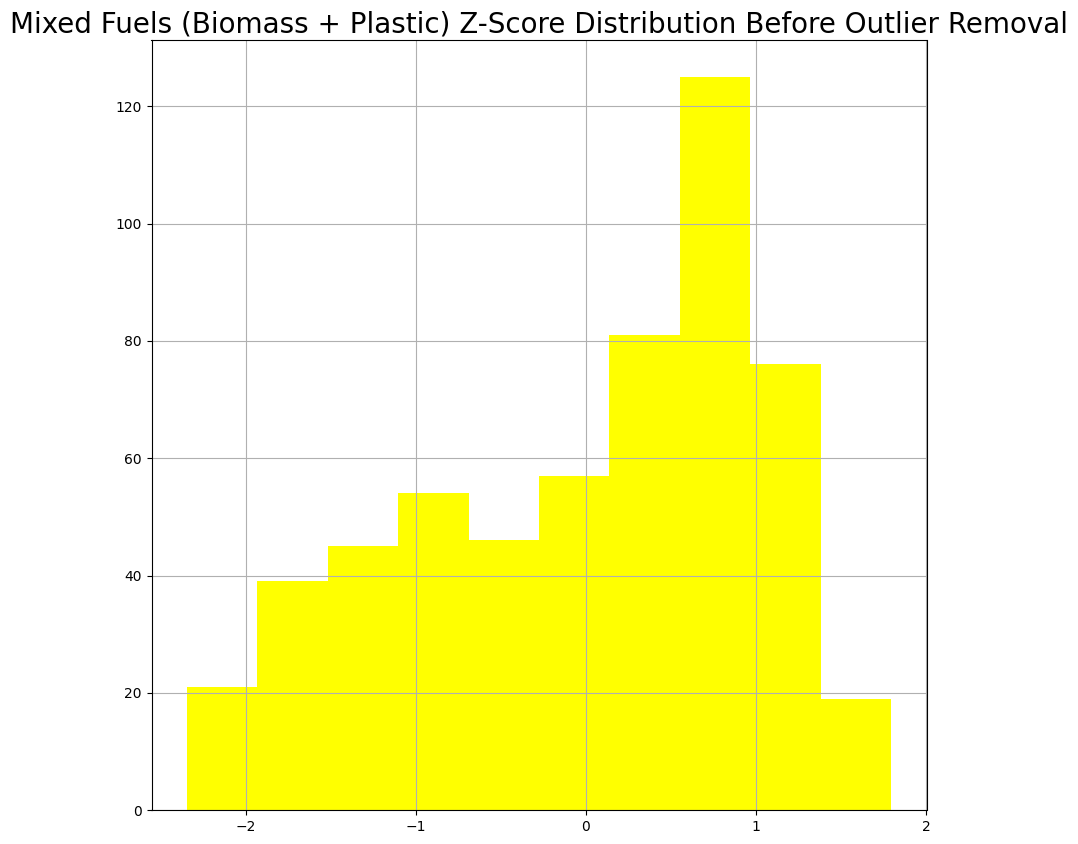

In [11]:
z_scores_mixed = stats.zscore(mixed_fuels['devol_yield'])
plt.figure(figsize = (10,10))
(z_scores_mixed.hist(color = 'yellow'))

plt.title("Mixed Fuels (Biomass + Plastic) Z-Score Distribution Before Outlier Removal", fontsize=20)
plt.show()

count    1.427000e+03
mean     3.983421e-16
std      1.000351e+00
min     -3.232969e+00
25%     -6.029769e-01
50%      4.983504e-02
75%      7.346920e-01
max      2.020693e+00
Name: devol_yield, dtype: float64


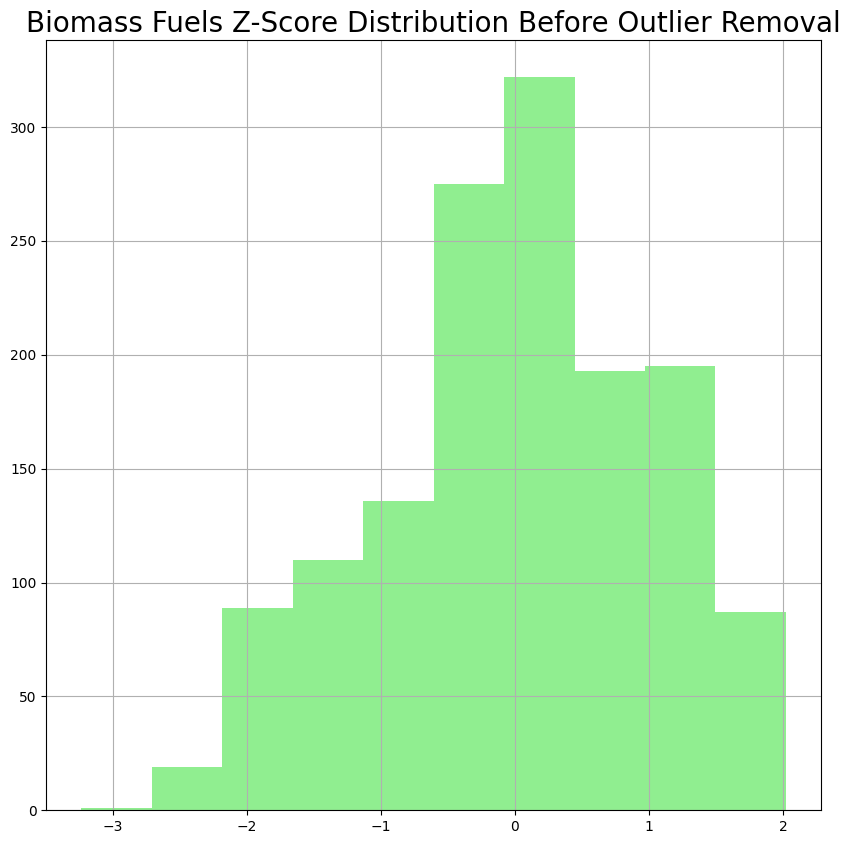

In [12]:
z_scores_biomass = stats.zscore(biomass_fuels['devol_yield'])

plt.figure(figsize = (10,10))
(z_scores_biomass.hist(color = 'lightgreen'))

print(z_scores_biomass.describe())
plt.title("Biomass Fuels Z-Score Distribution Before Outlier Removal", fontsize=20)
plt.show()

Summary statistics after outlier removal:
       temperature  residence_time     pressure    heat_rate  devol_yield  \
count  1377.000000     1377.000000  1377.000000  1377.000000  1377.000000   
mean    823.885258        5.651053     2.631808   884.241104    55.227615   
std     185.149048        4.509082     4.123707   299.512724    21.216175   
min     200.000000        0.500000     0.500000    10.000000     7.727594   
25%     600.000000        1.000000     1.000000  1000.000000    41.401709   
50%     800.000000        5.000000     1.000000  1000.000000    55.179704   
75%    1000.000000       10.000000     1.000000  1000.000000    71.362832   
max    1200.000000       20.000000    20.000000  1000.000000    98.332766   

                wc           vm           fc           ac            c  \
count  1377.000000  1377.000000  1377.000000  1377.000000  1377.000000   
mean      6.606514    61.151601    15.814381    16.440689    48.385772   
std       3.079526    14.680677    11.6858

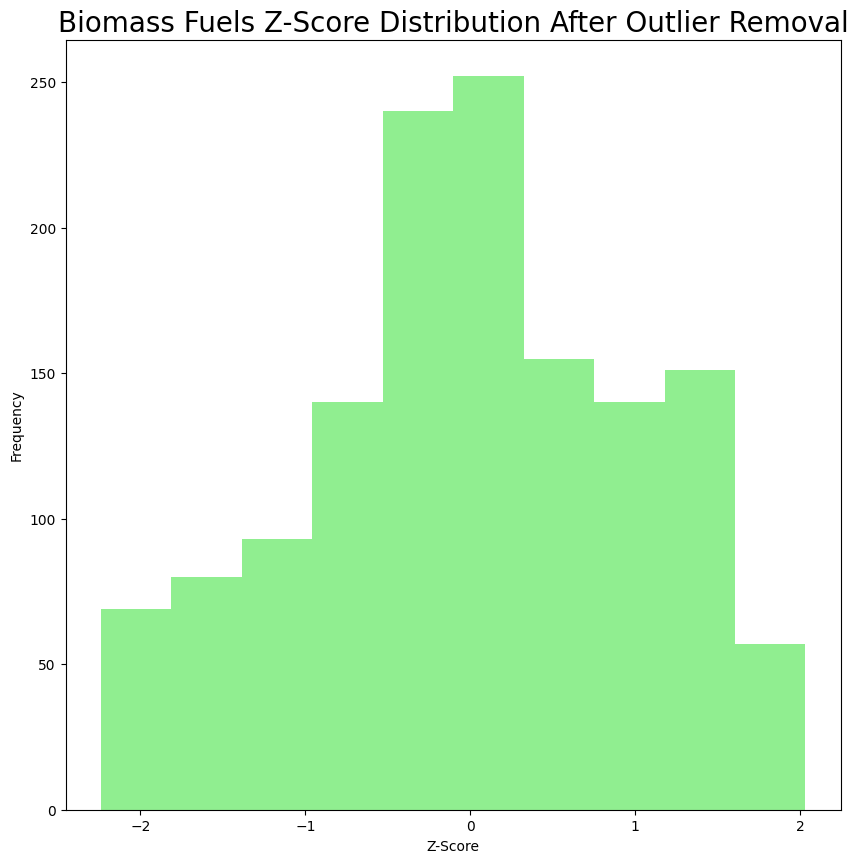

In [13]:
biomass_fuels_filtered = biomass_fuels[abs(z_scores_biomass) < 2]

# Show summary statistics of the filtered dataset
print("Summary statistics after outlier removal:")
print(biomass_fuels_filtered.describe())

# Optionally, visualize the filtered z-score distribution
z_score_filtered = stats.zscore(biomass_fuels_filtered['devol_yield'])
plt.figure(figsize=(10, 10))
plt.hist(z_score_filtered, color='lightgreen')
plt.title("Biomass Fuels Z-Score Distribution After Outlier Removal", fontsize=20)
plt.xlabel("Z-Score")
plt.ylabel("Frequency")
plt.show()

Summary statistics after outlier removal:
       temperature  residence_time    pressure  heat_rate  devol_yield  \
count   551.000000      551.000000  551.000000      551.0   551.000000   
mean    792.196007        4.735027    2.250454     1000.0    49.643160   
std     190.675559        4.044820    4.015750        0.0    19.374394   
min     400.000000        0.500000    1.000000     1000.0     8.571429   
25%     600.000000        1.000000    1.000000     1000.0    33.450155   
50%     800.000000        2.000000    1.000000     1000.0    53.967119   
75%    1000.000000       10.000000    1.000000     1000.0    64.875695   
max    1200.000000       10.000000   20.000000     1000.0    84.896715   

               wc          vm          fc          ac           c           h  \
count  551.000000  551.000000  551.000000  551.000000  551.000000  551.000000   
mean     6.552446   64.603074   11.771380   17.073100   52.202495    7.710924   
std      1.217611    7.356399    3.012897    3.5

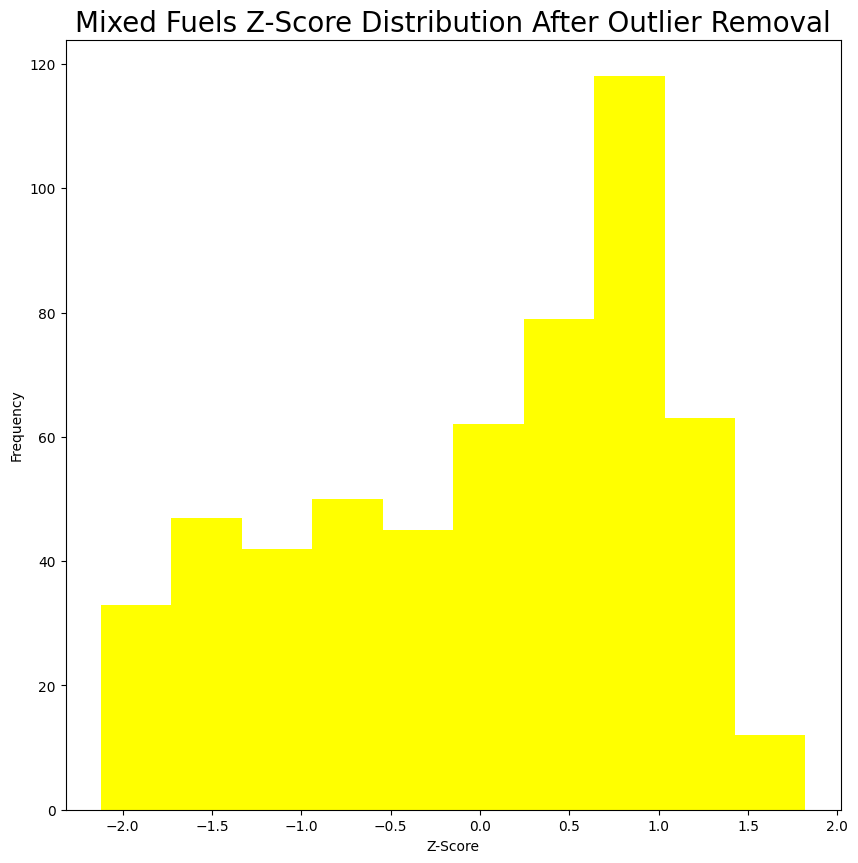

In [14]:
# Calculate z-scores for the 'devol_yield' column
z_scores_mixed = stats.zscore(mixed_fuels['devol_yield'])

# Filter rows where absolute z-scores are < 2
mixed_fuels_filtered = mixed_fuels[abs(z_scores_mixed) < 2]

# Summary statistics of the filtered dataset
print("Summary statistics after outlier removal:")
print(mixed_fuels_filtered.describe())

# Optional: Visualize the filtered z-score distribution
z_scores_mixed_filtered = stats.zscore(mixed_fuels_filtered['devol_yield'])
plt.figure(figsize=(10, 10))
plt.hist(z_scores_mixed_filtered, color='yellow')
plt.title("Mixed Fuels Z-Score Distribution After Outlier Removal", fontsize=20)
plt.xlabel("Z-Score")
plt.ylabel("Frequency")
plt.show()

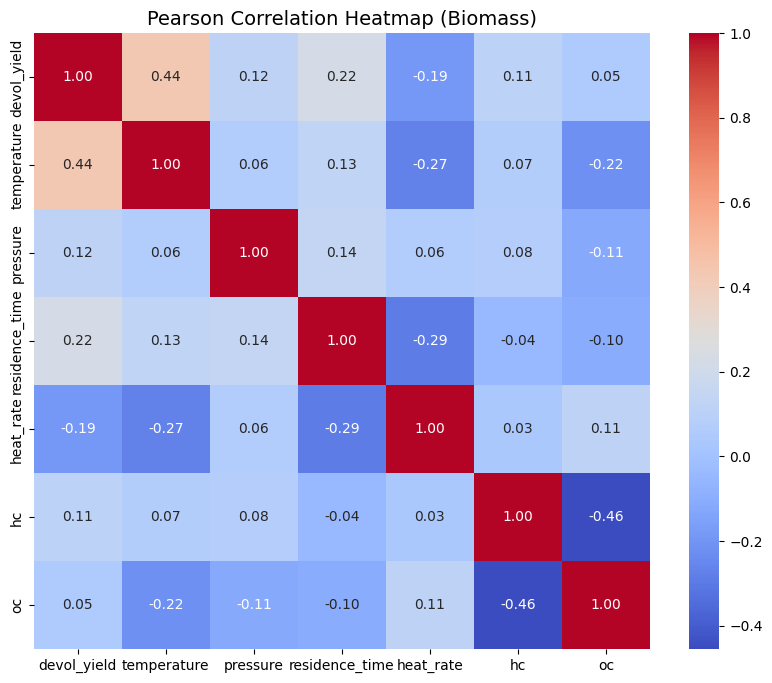

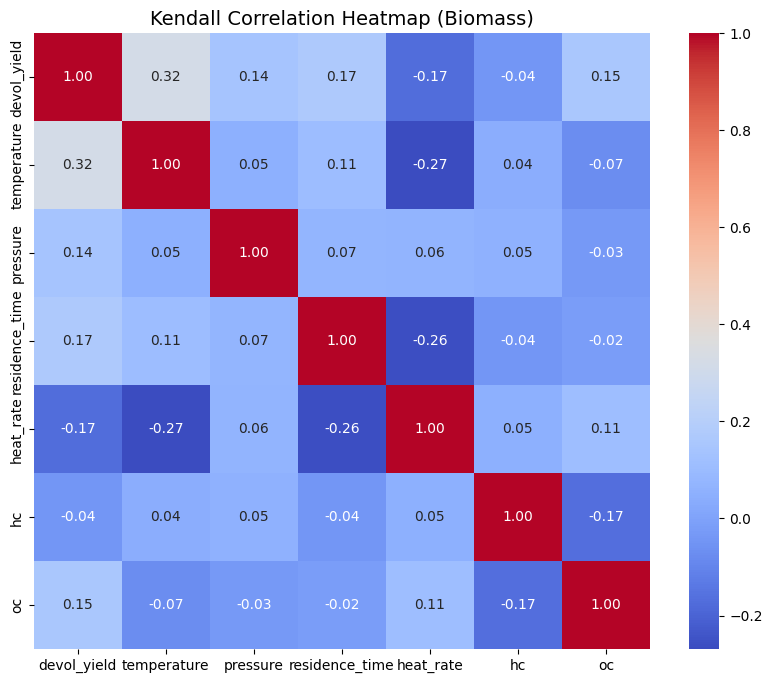

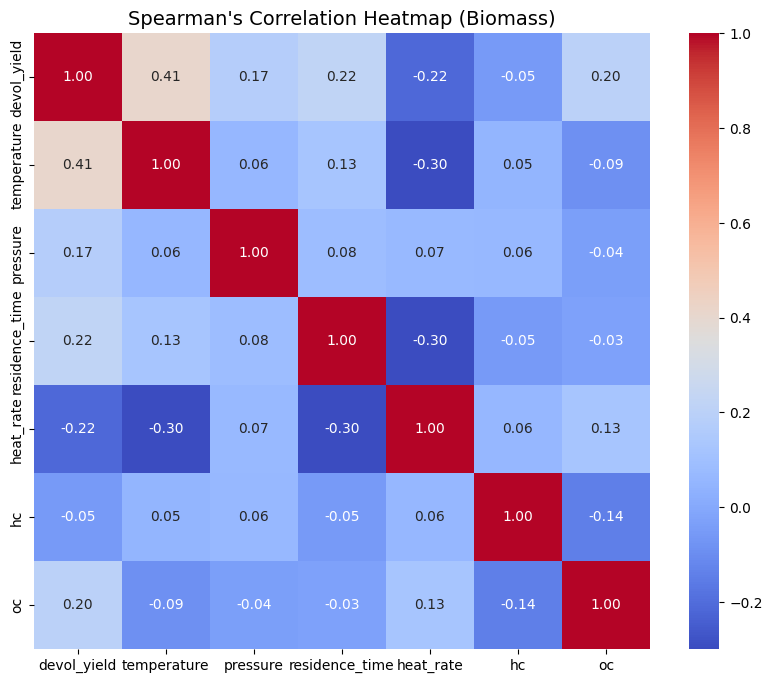

In [15]:
biomass_fuels_corr = biomass_fuels_filtered.select_dtypes(include=[float,int])
col_names = ['devol_yield','temperature', 'pressure', 'residence_time', 'heat_rate', 'hc', 'oc']

pearson_correlation = biomass_fuels_corr[col_names].corr()
kendall_correlation = biomass_fuels_corr[col_names].corr(method='kendall')
spearman_correlation = biomass_fuels_corr[col_names].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Pearson Correlation Heatmap (Biomass)", fontsize=14)
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(kendall_correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Kendall Correlation Heatmap (Biomass)", fontsize=14)
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Spearman's Correlation Heatmap (Biomass)", fontsize=14)
plt.show()

          Feature  Pearson_Coefficient       P_Value
0     temperature             0.436180  4.808107e-65
1        pressure             0.116126  1.561012e-05
2  residence_time             0.224339  3.613599e-17
3       heat_rate            -0.192019  6.674998e-13
4              hc             0.107956  5.966886e-05
5              oc             0.052107  5.321857e-02
6              fc            -0.192435  5.942367e-13
7              wc            -0.105661  8.554256e-05
8              ac            -0.315200  3.874320e-33


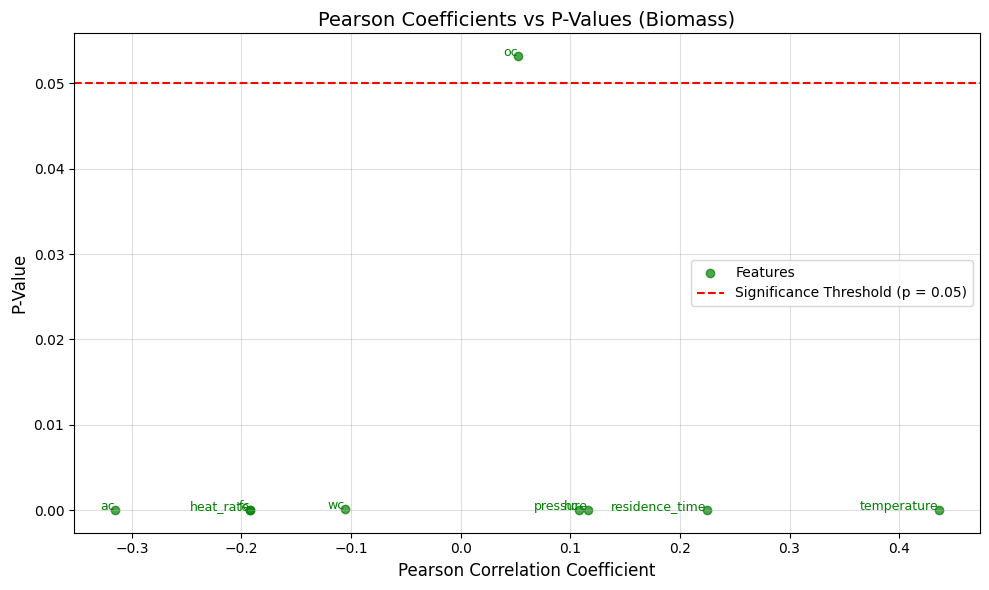

In [16]:
col_names = ['temperature', 'pressure', 'residence_time', 'heat_rate', 'hc', 'oc', 'fc','wc', 'ac']
pearsn = [stats.pearsonr(biomass_fuels_corr['devol_yield'], biomass_fuels_corr[col]) for col in col_names]
p_vals = [pearsn[i][1] for i in range(len(pearsn))]
pearsn_coeffs = [pearsn[i][0] for i in range(len(pearsn))]
result_df = pd.DataFrame({
    'Feature': col_names,
    'Pearson_Coefficient': pearsn_coeffs,
    'P_Value': p_vals
})
print(result_df)

plt.figure(figsize=(10, 6))
plt.scatter(result_df['Pearson_Coefficient'], result_df['P_Value'], color='green', alpha=0.7, label='Features')


plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (p = 0.05)')


for i, feature in enumerate(result_df['Feature']):
    plt.text(result_df['Pearson_Coefficient'][i], result_df['P_Value'][i], feature, fontsize=9, ha='right', color='green')


plt.title("Pearson Coefficients vs P-Values (Biomass)", fontsize=14)
plt.xlabel("Pearson Correlation Coefficient", fontsize=12)
plt.ylabel("P-Value", fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()

plt.show()

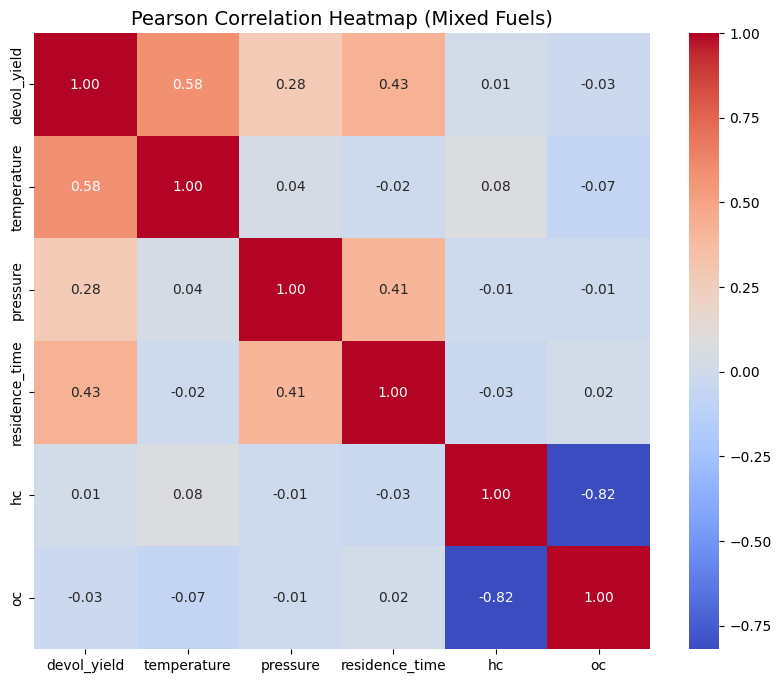

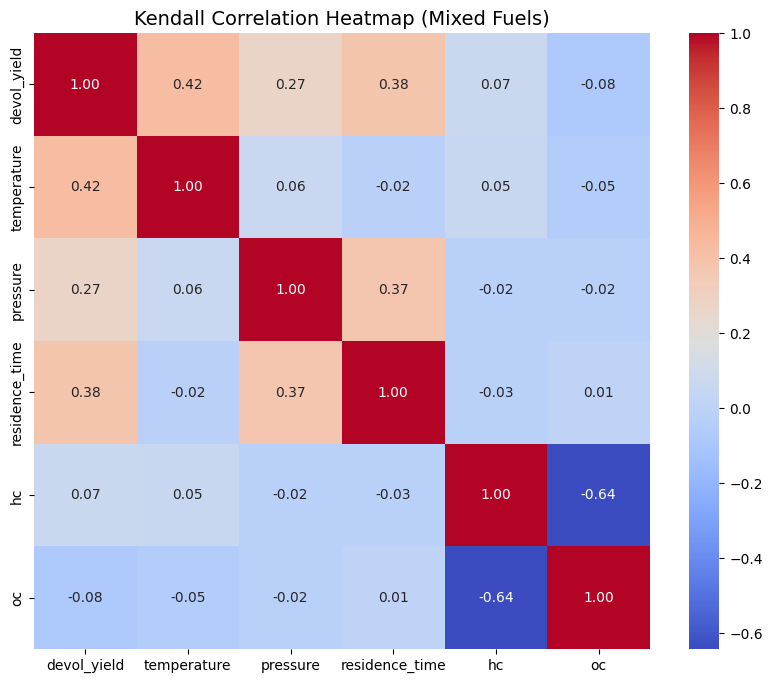

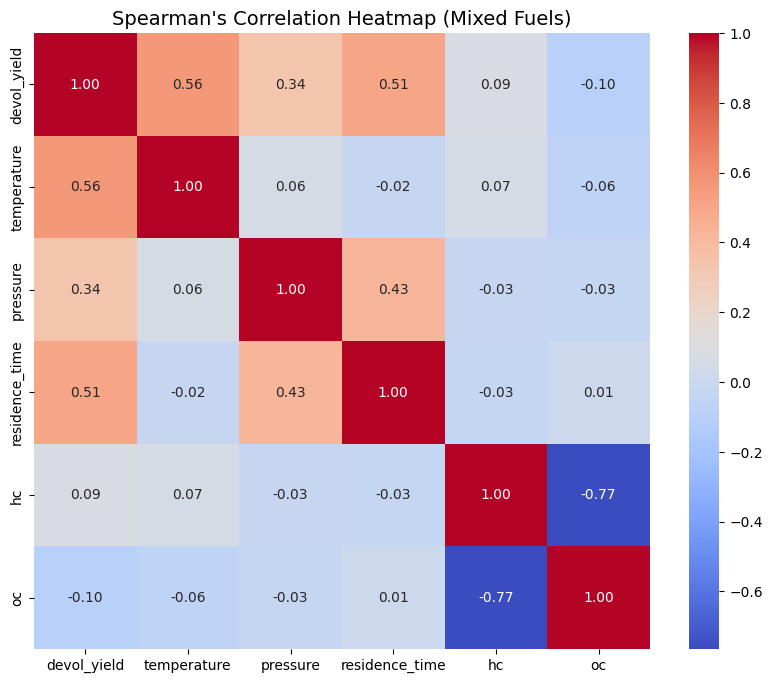

In [17]:
col_names = ['devol_yield','temperature', 'pressure', 'residence_time', 'hc', 'oc']
# Filter mixed_fuels_filtered to include only numeric columns
mixed_fuels_corr = mixed_fuels_filtered.select_dtypes(include=[float, int])

# Calculate correlation matrices
pearson_correlation = mixed_fuels_corr[col_names].corr()
kendall_correlation = mixed_fuels_corr[col_names].corr(method='kendall')
spearman_correlation = mixed_fuels_corr[col_names].corr(method='spearman')

# Plot Pearson Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, annot_kws={"size": 10})
plt.title("Pearson Correlation Heatmap (Mixed Fuels)", fontsize=14)
plt.show()

# Plot Kendall Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, annot_kws={"size": 10})
plt.title("Kendall Correlation Heatmap (Mixed Fuels)", fontsize=14)
plt.show()

# Plot Spearman Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, annot_kws={"size": 10})
plt.title("Spearman's Correlation Heatmap (Mixed Fuels)", fontsize=14)
plt.show()


          Feature  Pearson_Coefficient       P_Value
0     temperature             0.584728  7.646641e-52
1        pressure             0.277159  3.562089e-11
2  residence_time             0.426524  9.131722e-26
3              hc             0.013186  7.574569e-01
4              oc            -0.027199  5.240398e-01
5              fc            -0.052535  2.182405e-01
6              wc            -0.014118  7.409039e-01
7              ac            -0.047456  2.661183e-01


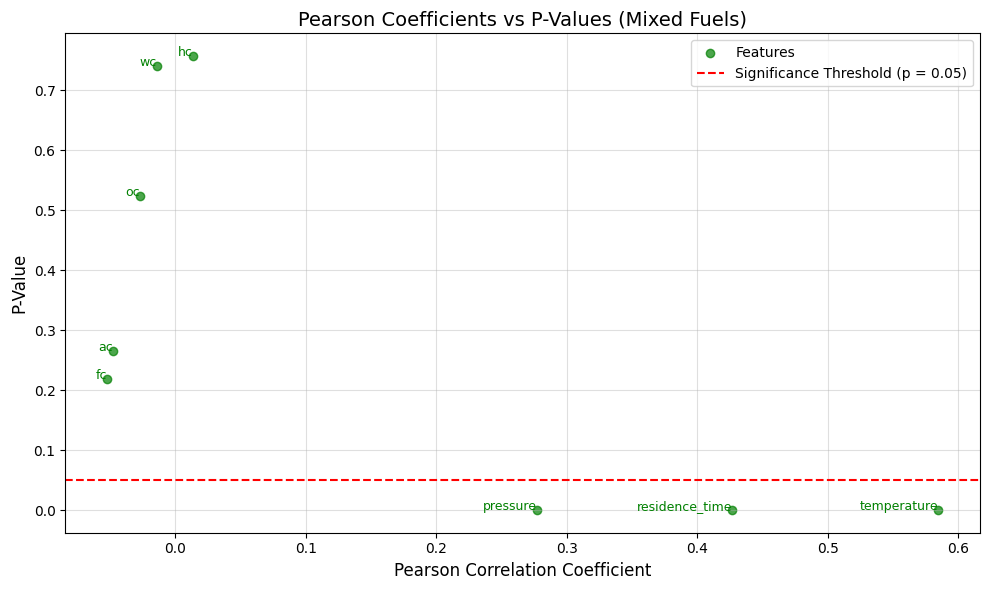

In [18]:
col_names = ['temperature', 'pressure', 'residence_time', 'hc', 'oc', 'fc','wc', 'ac']
pearsn = [stats.pearsonr(mixed_fuels_corr['devol_yield'], mixed_fuels_corr[col]) for col in col_names]
p_vals = [pearsn[i][1] for i in range(len(pearsn))]
pearsn_coeffs = [pearsn[i][0] for i in range(len(pearsn))]
result_df = pd.DataFrame({
    'Feature': col_names,
    'Pearson_Coefficient': pearsn_coeffs,
    'P_Value': p_vals
})
print(result_df)

plt.figure(figsize=(10, 6))
plt.scatter(result_df['Pearson_Coefficient'], result_df['P_Value'], color='green', alpha=0.7, label='Features')


plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (p = 0.05)')


for i, feature in enumerate(result_df['Feature']):
    plt.text(result_df['Pearson_Coefficient'][i], result_df['P_Value'][i], feature, fontsize=9, ha='right', color='green')


plt.title("Pearson Coefficients vs P-Values (Mixed Fuels)", fontsize=14)
plt.xlabel("Pearson Correlation Coefficient", fontsize=12)
plt.ylabel("P-Value", fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()

plt.show()

In [19]:
#biomass + mixed fuels w/o outliers
filtered_data_total = pd.concat([biomass_fuels_filtered,mixed_fuels_filtered], axis = 0)
print(biomass_fuels_filtered.describe())
print(mixed_fuels_filtered.describe())

       temperature  residence_time     pressure    heat_rate  devol_yield  \
count  1377.000000     1377.000000  1377.000000  1377.000000  1377.000000   
mean    823.885258        5.651053     2.631808   884.241104    55.227615   
std     185.149048        4.509082     4.123707   299.512724    21.216175   
min     200.000000        0.500000     0.500000    10.000000     7.727594   
25%     600.000000        1.000000     1.000000  1000.000000    41.401709   
50%     800.000000        5.000000     1.000000  1000.000000    55.179704   
75%    1000.000000       10.000000     1.000000  1000.000000    71.362832   
max    1200.000000       20.000000    20.000000  1000.000000    98.332766   

                wc           vm           fc           ac            c  \
count  1377.000000  1377.000000  1377.000000  1377.000000  1377.000000   
mean      6.606514    61.151601    15.814381    16.440689    48.385772   
std       3.079526    14.680677    11.685815    14.624548    14.892985   
min       

In [20]:
filtered_data_total.head()

,sample,temperature,residence_time,pressure,heat_rate,devol_yield,wc,vm,fc,ac,c,h,o,n,s,cl,hc,oc,lhv
5,brown_coal_6,600,1.0,1.0,1000,27.595269,10.8,44.2,40.9,4.2,63.4,3.9,16.2,0.9,0.6,0.0,0.7,0.2,20.13
8,brown_coal_10,600,1.0,1.0,1000,21.660053,10.8,44.2,40.9,4.2,63.4,3.9,16.2,0.9,0.6,0.0,0.7,0.2,20.13
11,brown_coal_13,600,2.0,1.0,1000,12.372635,10.8,44.2,40.9,4.2,63.4,3.9,16.2,0.9,0.6,0.0,0.7,0.2,20.13
14,brown_coal_16,600,2.0,1.0,1000,17.698227,10.8,44.2,40.9,4.2,63.4,3.9,16.2,0.9,0.6,0.0,0.7,0.2,20.13
15,brown_coal_17,600,5.0,1.0,1000,9.536474,10.8,44.2,40.9,4.2,63.4,3.9,16.2,0.9,0.6,0.0,0.7,0.2,20.13


In [21]:
labels = pd.concat([filtered_data_total['sample'], filtered_data_total['devol_yield']], axis = 1)
features = filtered_data_total.drop(columns=['sample', 'devol_yield'])

In [22]:
labels.head()
features.columns

Index(['temperature', 'residence_time', 'pressure', 'heat_rate', 'wc', 'vm',
       'fc', 'ac', 'c', 'h', 'o', 'n', 's', 'cl', 'hc', 'oc', 'lhv'],
      dtype='object')